# Signal to Noise Ratio (SNR)

## Basic Definition
The main idea is to make a *ratio* between signal power to noise power.

$$ SNR = \frac{P_{signal}}{P_{noise}} $$

So we need to measure the *power* $P(x)$ of a signal $x$,  via:

$$P(x)=1/N \cdot \displaystyle\sum_{n=0}^{N-1}x(n)^2$$

Which is simply taking the square of the signal and then the average.
We can then calculate the $SNR$ via the power ratios:

$$ SNR = \frac{P_{signal}}{P_{noise}}$$

Typically we want to have the values in dB. Since we have power signals alread we need to use 

$$P_{db} = 10 \cdot log_{10} (P) $$

So
$$ SNR_{db} = 10 \log_{10} \frac{P_{signal}}{P_{noise}}$$

This is it. Actually, we can also convert the power levels first to dB and then subtract (subtracting to logarithmic values is the same as dividing to linear ones):


$$ 
10 \log_{10} \left ( \frac{P_\mathrm{signal}}{P_\mathrm{noise}} \right ) = 10 \log_{10} \left ( P_\mathrm{signal} \right ) - 10 \log_{10} \left ( P_\mathrm{noise} \right )
$$


## Measuring

### Method 1
Sometimes, the question arises how to get the noise and the Signal separately.
One method is to measure the constant noise power a device *produces without an input*, let's call that $P_n$ and measure the power of the output of a device *with* an input, lets call that $P_s$. By subtraction of the powers, we can estimate the power of the signal alone and therefore the ratio between signal and noise power (assuming noise power stays constant).     

$$ SNR_{db}=10 \cdot \log_{10} \frac {P_s - P_n}{P_n}$$

- $P(s)$ is a function that computes the power of a signal.
- $P_s$ in this case is the power of the signal + the noise, typically the output of the system we want to measure **with** an input signal.
- $P_n$ in this case is the power of just the noise, typically the output of the system we want to measure **without** an input signal.

### Method 2
Another method is to try to make the system as clean as possible (eg bypass or similar *at unity gain!*), measure input signal power $P_i$ and output signal power $P_o$ and just assume that the difference between them is the level of noise being added:
$$ P_n = P_o - P_i $$
The rest of the comutation stays the same as Method 1.


### Method 3: Spectral

### Method 4: Standard deviation 
This method can be found all over the internet but is not so interesting for us. 
e.g. `scipy.stats.signaltonoise()`
The idea is to  *[TODO]*


## refs:
- https://en.wikipedia.org/wiki/Signal-to-noise_ratio
- https://de.mathworks.com/help/signal/ref/snr.html
- https://dsp.stackexchange.com/questions/17871/how-to-calculate-signal-to-noise-ratio



# Setup

In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
# !pip install seaborn

In [3]:
import seaborn as sn

In [4]:
sn.set_theme()

In [5]:
def exampleSystem(x, noiseAmount =-50):
    N = len(x)
    noise = (random.random(N)*2-1) * 10**(noiseAmount/10) 
    y = x+noise
    return y

In [6]:
sr = 48000
T = 0.1 #seconds
N = int(T*sr)
n = arange(N)
t = n/sr

silence = zeros(N)

In [7]:
noiseOnly = exampleSystem(silence) #system Output without signal at input

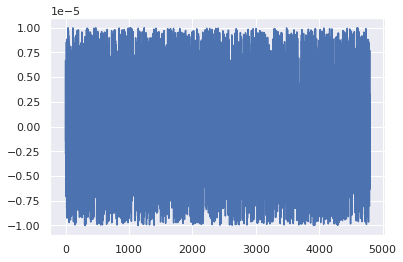

In [8]:
plot(noiseOnly)

In [9]:
freq = 1000 #Hz
exampleInput = sin(2*pi*freq*t)

In [10]:
exampleOutput = exampleSystem(exampleInput)

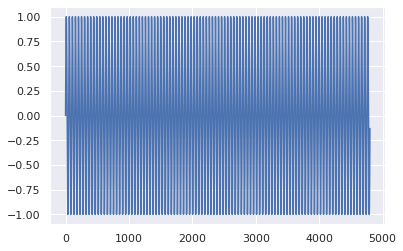

In [11]:
plot(exampleOutput)

# Method 1 & 2

In [12]:
def signalPower(x):
    return average(x**2)

In [13]:
def SNR(signal, noise):
    powS = signalPower(signal)
    powN = signalPower(noise)
    return 10*log10((powS-powN)/powN)

In [14]:
def SNRsystem(inputSig, outputSig):
    noise = outputSig-inputSig
    
    powS = signalPower(outputSig)
    powN = signalPower(noise)
    return 10*log10((powS-powN)/powN)

In [15]:
SNR(exampleOutput,noiseOnly)

101.69884959997628

In [16]:
SNRsystem(exampleInput,exampleOutput)

101.69164570398095

# Method 3: Spectral
## TODO
- Working, but needs clean-up
- can't deal with harmonics, need to detect them like fundamental, take them out, etc.

If N doubles, measured noise level in spectrogram goes down by 3 dB.

- https://de.mathworks.com/help/signal/ref/bandpower.html
- http://classes.engr.oregonstate.edu/eecs/spring2017/ece627/Lecture%20Notes/FFT%20for%20delta-sigma%20spectrum%20estimation.pdf
- https://de.mathworks.com/help/signal/ref/snr.html
- https://training.ti.com/sites/default/files/docs/TIPL%204703%20-%20Understanding%20Signal%20to%20Noise%20Ratio%20and%20Noise%20Spectral%20Density%20in%20High%20Speed%20Datat%20Converters_3.pdf

In [17]:
from scipy.stats import norm
np.random.seed(1) #reproducability

In [18]:
# matlab like randn function, for comparison reasons with matlab code. Only needed to create test signal.
matlabRandn = lambda n:norm.ppf(np.random.rand(1,n)).flatten()

In [19]:
A = 1.0
a = 0.0
s = 0.1
powFund = A**2/2
powHarm = a**2/2
varnoise = s**2
f0 = 9000#*(sr/2)
h1 = 20000
x = A * cos(pi*2*f0*t)+a*sin(pi*2*t*h1)+s*matlabRandn(len(t))
x = tanh(x*2)

In [20]:
x = x-mean(x) #remove DC first!!

In [21]:
defSNR = 10*log10(powFund/varnoise)
print('SNR by definition, not computation: {} dB'.format(defSNR))

SNR by definition, not computation: 16.989700043360187 dB


In [23]:
# spec = fft.rfft(exampleOutput,norm='ortho')
# 
# magnitude = abs(spec)
# powerSpec = magnitude**2
# dbPow = 20*log10(powerSpec)

In [24]:
# fundamentalBin = peakdetect.detect_peaks(magnitude,threshold=100)
# fundamentalFreq = (fundamentalBin/len(spec-1))*(sr/2)

In [25]:
# stem(freqAxis, dbPow, label= 'mag spectrum')
# scatter(fundamentalFreq, dbMag[fundamentalBin], marker='x', color='r',label='peak')
# xlim([0,100])
# legend()

In [26]:
import scipy.signal as sig

In [27]:
# f, Pxx_spec = sig.welch(exampleOutput,fs=sr)

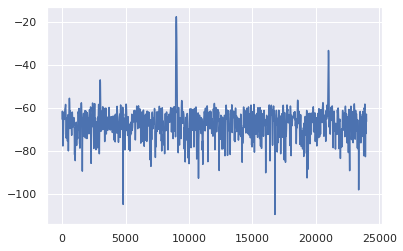

In [28]:
faxis,ps = sig.periodogram(x,fs=sr, window=('kaiser',38),)#,scaling='spectrum')
fundBin = argmax(ps) 

_=plot(faxis,10*log10(ps))

In [29]:
# t = linspace(0,1,1000);
# x = cos(2*pi*100*t)+matlabRandn(len(t));
# l2norm = linalg.norm(x)**2./len(x)

In [30]:
# l2norm

In [31]:
def bandpower(ps, mode='psd'):
    """
    estimate bandpower, see https://de.mathworks.com/help/signal/ref/bandpower.html
    """
    if mode=='time':
        x = ps
        l2norm = linalg.norm(x)**2./len(x)
        return l2norm
    elif mode == 'psd':
        return sum(ps)        

In [32]:
# plot(faxis,10*log10(ps))

In [33]:
# stem(dbMag, label= 'mag spectrum')
# # scatter(fundamentalFreq, dbMag[fundamentalBin], marker='x', color='r',label='peak')
# xlim([0,20])
# legend()

In [34]:
def getIndizesAroundPeak(arr, peakIndex,searchWidth=1000):
    peakBins = []
    magMax = arr[peakIndex]
    curVal = magMax
    for i in range(searchWidth):
        newBin = peakIndex+i
        newVal = arr[newBin]
        if newVal>curVal:
            break
        else:
            peakBins.append(int(newBin))
            curVal=newVal
    curVal = magMax
    for i in range(searchWidth):
        newBin = peakIndex-i
        newVal = arr[newBin]
        if newVal>curVal:
            break
        else:
            peakBins.append(int(newBin))
            curVal=newVal
    return array(list(set(peakBins)))



In [35]:
def freqToBin(fAxis, Freq):
    return argmin(abs(fAxis-Freq))

def getPeakInArea(psd, faxis, estimation, searchWidthHz = 10):
    """
    returns bin and frequency of the maximum in an area
    """
    binLow = freqToBin(faxis, estimation-searchWidthHz)
    binHi = freqToBin(faxis, estimation+searchWidthHz)
    peakbin = binLow+argmax(psd[binLow:binHi])
    return peakbin, faxis[peakbin]

def getHarmonics(fund,sr,nHarmonics=6,aliased=False):
    harmonicMultipliers = arange(2,nHarmonics+2)
    harmonicFs = fundFrequency*harmonicMultipliers
    print(harmonicFs)
    if not aliased:
        harmonicFs[harmonicFs>sr/2] = -1
        harmonicFs = np.delete(harmonicFs,harmonicFs==-1)
    else:
        nyqZone = floor(harmonicFs/(sr/2))
        oddEvenNyq = nyqZone%2  
        print(oddEvenNyq)
        harmonicFs = mod(harmonicFs,sr/2)
        harmonicFs[oddEvenNyq==1] = (sr/2)-harmonicFs[oddEvenNyq==1]
    return harmonicFs   

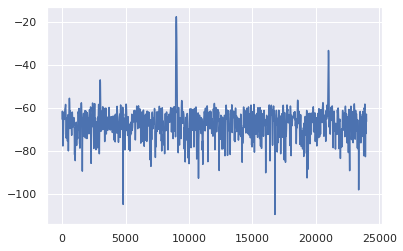

In [36]:
faxis,ps = sig.periodogram(x,fs=sr, window=('kaiser',38),)#,scaling='spectrum')
fundBin = argmax(ps) 

fundIndizes = getIndizesAroundPeak(ps,fundBin)
fundFrequency = faxis[fundBin]

_=plot(faxis,10*log10(ps))

In [37]:
# def getHarmonics(fund,sr,nHarmonics=6,aliased=False):
#     harmonicMultipliers = arange(2,nHarmonics+2)
#     harmonicFs = fundFrequency*harmonicMultipliers
#     print(harmonicFs)
#     if not aliased:
#         harmonicFs[harmonicFs>sr/2] = -1
#         harmonicFs = np.delete(harmonicFs,harmonicFs==-1)
#     else:
#         nyqZone = floor(harmonicFs/(sr/2))
#         oddEvenNyq = nyqZone%2  
#         print(oddEvenNyq)
#         harmonicFs = mod(harmonicFs,sr/2)
#         harmonicFs[oddEvenNyq==1] = (sr/2)-harmonicFs[oddEvenNyq==1]
#     return harmonicFs

In [38]:
# harmonicFs[harmonicFs==-1]

In [39]:
# getHarmonics(fundFrequency,sr,aliased=True)

In [40]:
# nHarmonics=6
# harmonicMultipliers = arange(2,nHarmonics+2)
# harmonicFs = fundFrequency*harmonicMultipliers

In [41]:
nHarmonics = 6
harmonicFs = getHarmonics(fundFrequency,sr,nHarmonics=nHarmonics,aliased=True)

[18000. 27000. 36000. 45000. 54000. 63000.]
[0. 1. 1. 1. 0. 0.]


In [42]:
# harmonicFs

In [43]:
# faxis[1999]

In [44]:
harmonicBorders = zeros([2,nHarmonics],dtype=int16).T
# harmonicBorders
fullHarmonicBins = np.array([], dtype=int16)
fullHarmonicBinList = []
harmPeakFreqs=[]
harmPeaks=[]
for i,harmonic in enumerate(harmonicFs):
    searcharea = 0.1*fundFrequency
    estimation = harmonic
    
    binNum, freq = getPeakInArea(ps,faxis,estimation,searcharea)
    harmPeakFreqs.append(freq)
    harmPeaks.append(ps[binNum])
    allBins = getIndizesAroundPeak(ps, binNum,searchWidth=1000)
    fullHarmonicBins=np.append(fullHarmonicBins,allBins)
    fullHarmonicBinList.append(allBins)
    harmonicBorders[i,:] = [allBins[0], allBins[-1]]
    print(freq)

18570.0
21000.0
12000.0
3000.0
6020.0
15120.0


In [45]:
fundIndizes.sort()

In [46]:
pFund = bandpower(ps[fundIndizes[0]:fundIndizes[-1]])

In [47]:
fundRemoved = np.delete(ps,fundIndizes)
fAxisFundRemoved = np.delete(faxis,fundIndizes)

In [48]:
def plotSNR(ps, faxis, fundIndizes, fullHarmonicBinList, harmPeaks, harmPeakFreqs, ):
    fig, ax = plt.subplots()
    arrowprops = dict(
        arrowstyle="->",
        connectionstyle="angle,angleA=0,angleB=90,rad=10")
    bbox = dict(boxstyle="round", fc="0.8")
    offset = 10


    plot(faxis,10*log10(ps), c='r', label='noise')
    plot(faxis[fundIndizes], 10*log10(ps[fundIndizes]), c='b', label='$f_0$')
    for i,harm in enumerate(fullHarmonicBinList):
        plot(faxis[harm], 10*log10(ps[harm]),'k')

        ax.annotate("f{}".format(i+1),
        (harmPeakFreqs[i], 10*log10(harmPeaks[i])),
        xytext=(0, 30), textcoords='offset points',
        bbox=bbox, arrowprops=arrowprops)

    legend()
    return

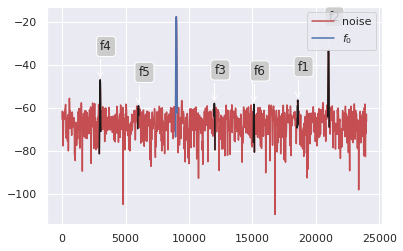

In [49]:
plotSNR(ps,faxis, fundIndizes,fullHarmonicBinList,harmPeaks,harmPeakFreqs)

In [50]:
# fig, ax = plt.subplots()
# arrowprops = dict(
#     arrowstyle="->",
#     connectionstyle="angle,angleA=0,angleB=90,rad=10")
# bbox = dict(boxstyle="round", fc="0.8")
# offset = 10


# plot(faxis,10*log10(ps), c='r', label='noise')
# plot(faxis[fundIndizes], 10*log10(ps[fundIndizes]), c='b', label='$f_0$')
# for i,harm in enumerate(fullHarmonicBinList):
#     plot(faxis[harm], 10*log10(ps[harm]),'k')
# #     ax=gca()
#     ax.annotate("f{}".format(i+1),
#     (harmPeakFreqs[i], 10*log10(harmPeaks[i])),
#     xytext=(0, 30), textcoords='offset points',
#     bbox=bbox, arrowprops=arrowprops)
# # xlim([500, 8000])
# legend()

In [51]:
# harmPeaks

In [52]:
import copy

In [53]:
noisePrepared = copy.copy(ps)

In [54]:
noisePrepared[fundIndizes] = 0
noisePrepared[fullHarmonicBins] = 0
noiseMean = median(noisePrepared[noisePrepared!=0])
noisePrepared[fundIndizes] = noiseMean 
noisePrepared[fullHarmonicBins] = noiseMean

In [55]:
noisePower = bandpower(noisePrepared)

In [56]:
r = 10*log10(pFund/noisePower)

In [57]:
print('SNR by definition, not computation: {} dB'.format(defSNR))
print('measured SNR: {} dB'.format(r))
print('Noise Power: {} dB'.format(10*log10(noisePower)))

SNR by definition, not computation: 16.989700043360187 dB
measured SNR: 18.66659501460589 dB
Noise Power: -30.761416539002507 dB


In [58]:
onlyNoise = fundRemoved

# Method 4: Std Deviation 

In [59]:
import numpy as np

def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

In [60]:
x = np.random.random(50)*0.5

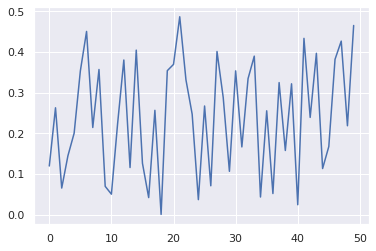

In [61]:
plot(x)

In [62]:
signaltonoise(x)

array(1.73986117)